### 2.1 Write a program to generate the state 1/√2 * (|01⟩+|10⟩)

In [1]:
from qiskit import *
%matplotlib inline

In [2]:
qc = QuantumCircuit(2, 2)

In [3]:
qc.h(1);

In [4]:
qc.cx(0, 1);

In [5]:
qc.cx(1, 0);

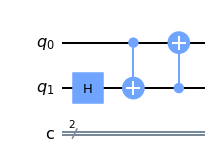

In [6]:
qc.draw(output = "mpl")

In [7]:
from qiskit.quantum_info import Statevector
state = Statevector.from_int(1, 4)
state = state.evolve(qc)
state.draw('latex')

<IPython.core.display.Latex object>

In [8]:
circuit = QuantumCircuit(2)

### 2.2 Generate The Density Matrix for the above state

In [9]:
import qiskit.quantum_info as qi

In [10]:
rho_AB = qi.DensityMatrix.from_instruction(qc)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

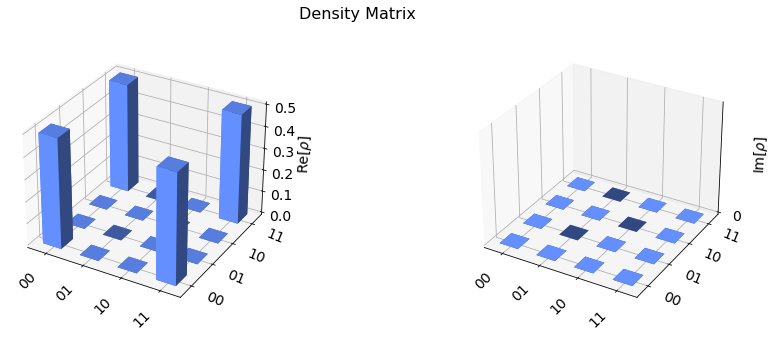

In [11]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')

### 2.3 Partial Trace

In [12]:
print(rho_AB.data)



[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]


In [15]:
PT = qi.partial_trace(rho_AB,[0])

print (PT.data)

[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]


### 2.4 Decomposition of Swap Gate into CNOT gate

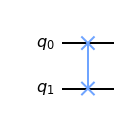

In [16]:
qc_new = QuantumCircuit(2)
qc_new.swap(0,1)
qc_new.draw(output = "mpl")

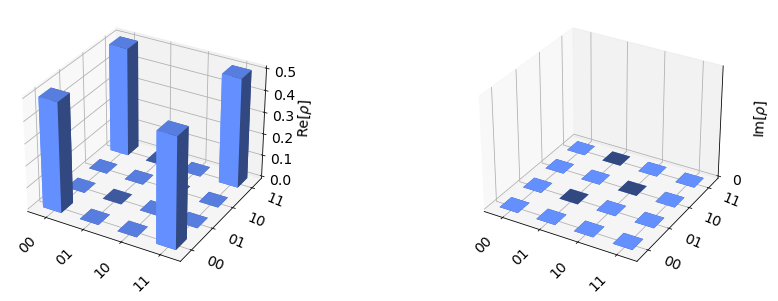

In [17]:
rho_AB = qi.DensityMatrix.from_instruction(qc_new)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')
Statevector(qc).draw('city')

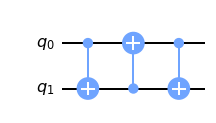

In [18]:
qc_c = QuantumCircuit(2)

qc_c.cx(0,1)
qc_c.cx(1,0)
qc_c.cx(0,1)
qc_c.draw(output = "mpl")

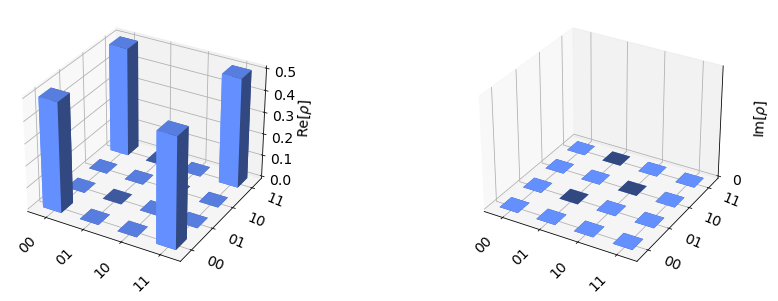

In [19]:
rho_AB = qi.DensityMatrix.from_instruction(qc_c)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')
Statevector(qc).draw('city')

### 2.5

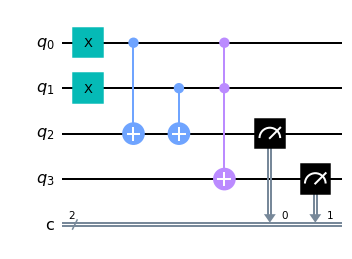

In [28]:
new_qc = QuantumCircuit(4,2)
new_qc.x(0)
new_qc.x(1)

new_qc.cx(0,2)
new_qc.cx(1,2)

new_qc.ccx(0,1,3)

new_qc.measure(2,0)
new_qc.measure(3,1)

new_qc.draw(output='mpl')